In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno

from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

# 폐기물 처리현황 (생활계폐기물)

In [2]:
# 데이터 불러오기
df_waste_total = pd.read_csv('./datas/waste_total0210.csv', header=[0,1,2,3], index_col=[0,1,2])
df_waste_total

시도별(1)         1996                                                       \
시도별(1)           총계 종량제방식에의한혼합배출                                           
시도별(1)           소계          가연성                                           
시도별(1)           소계      음식물 채소류     종이류     나무류   고무피혁류   플라스틱류      기타   
합계 발생량 소계   49925.2      14531.8  6379.7  1856.7  1121.9  2166.4  4249.2   
   처리량 기타       0.0          0.0     0.0     0.0     0.0     0.0     0.0   
       매 립  34115.6      13486.4  5276.5  1420.7   997.6  1907.6  3816.5   
       소 각   2725.0        569.5   994.7   386.0   111.3   229.2   377.6   
       재활용  13084.6        475.9   108.5    50.0    13.0    29.6    55.1   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)         불연성                  ...          윤활유   형광등     고철류     의류   
시도별(1)         연탄재     금속류     토사류  ...           소계    소계      소계     소계   
합계 발생량 소계   1852.9  1547.4  1410.1  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매 립  1821.6  1408.2  1372.0  ...          0.0   0.0     0.0    0.0   
       소 각     0.0    12.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    31.3   127.2    38.1  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[5 rows x 536 columns]

In [3]:
df_waste_total.index.values

array([('합계', '발생량', '소계'), ('합계', '처리량', '기타'), ('합계', '처리량', '매 립'),
       ('합계', '처리량', '소 각'), ('합계', '처리량', '재활용')], dtype=object)

In [4]:
df_waste_total.index = ['발생량', '기타 처리량', '매립 처리량', '소각 처리량', '재활용 처리량']

In [5]:
df_waste_total_t = df_waste_total.T
df_waste_total_t

발생량  기타 처리량   매립 처리량  소각 처리량  재활용 처리량
시도별(1) 시도별(1)       시도별(1) 시도별(1)                                            
1996   총계           소계     소계       49925.2     0.0  34115.6  2725.0  13084.6
       종량제방식에의한혼합배출 가연성    음식물 채소류  14531.8     0.0  13486.4   569.5    475.9
                           종이류       6379.7     0.0   5276.5   994.7    108.5
                           나무류       1856.7     0.0   1420.7   386.0     50.0
                           고무피혁류     1121.9     0.0    997.6   111.3     13.0
...                                     ...     ...      ...     ...      ...
2018   재활용가능자원 분리배출 가구류    소계         670.1     0.0      0.0     0.0    670.1
                    폐식용유   소계          58.7     0.0      0.0     0.0     58.7
                    재활용잔재물 소계        1546.5     0.0      0.0     0.0   1546.5
                    기타     소계        1052.1     0.0      0.0     0.0   1052.1
       음식물류폐기물분리배출  소계     소계       14477.2     0.0    140.6   297.0  14039.6

[536 rows x 5 columns]

In [6]:
df_waste_total_t.index.values[:10]

array([('1996', '총계', '소계', '소계'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '음식물 채소류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '종이류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '나무류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '고무피혁류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '플라스틱류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '기타'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '연탄재'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '금속류'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '토사류')], dtype=object)

In [7]:
year = []
for i in range(0, len(df_waste_total_t.index)):
    year.append(df_waste_total_t.index.values[i][0])

In [8]:
len(year)

536

In [9]:
# 연도 추가
df_waste_total_t['연도'] = year

In [10]:
len(df_waste_total_t.index)

536

In [11]:
# 보기 편하게 수정

gubun = []
for i in range(0, len(df_waste_total_t.index)):
    if df_waste_total_t.index.values[i][1] == '총계':
        gubun.append('총계')
    elif df_waste_total_t.index.values[i][1] == '종량제방식에의한혼합배출':
        gubun.append(df_waste_total_t.index.values[i][3]+'('+df_waste_total_t.index.values[i][2]+')')
    elif df_waste_total_t.index.values[i][1] == '재활용가능자원 분리배출':
        gubun.append(df_waste_total_t.index.values[i][2])
    elif df_waste_total_t.index.values[i][1] == '음식물류폐기물분리배출':
        gubun.append('음식물류')

In [12]:
gubun[:20]

['총계',
 '음식물 채소류(가연성)',
 '종이류(가연성)',
 '나무류(가연성)',
 '고무피혁류(가연성)',
 '플라스틱류(가연성)',
 '기타(가연성)',
 '연탄재(불연성)',
 '금속류(불연성)',
 '토사류(불연성)',
 '기타(불연성)',
 '종이류',
 '유리병류',
 '캔류',
 '플라스틱류',
 '고철류',
 '기타',
 '총계',
 '음식물 채소류(가연성)',
 '종이류(가연성)']

In [13]:
# 기타 : 재활용가능자원 분리배출의 '기타'

In [14]:
len(gubun)

536

In [15]:
# 알아보기 편하게 인덱스 수정
df_waste_total_t.index = gubun

In [16]:
df_waste_total_t

,발생량,기타 처리량,매립 처리량,소각 처리량,재활용 처리량,연도
총계,49925.2,0.0,34115.6,2725.0,13084.6,1996
음식물 채소류(가연성),14531.8,0.0,13486.4,569.5,475.9,1996
종이류(가연성),6379.7,0.0,5276.5,994.7,108.5,1996
나무류(가연성),1856.7,0.0,1420.7,386.0,50.0,1996
고무피혁류(가연성),1121.9,0.0,997.6,111.3,13.0,1996
...,...,...,...,...,...,...
가구류,670.1,0.0,0.0,0.0,670.1,2018
폐식용유,58.7,0.0,0.0,0.0,58.7,2018
재활용잔재물,1546.5,0.0,0.0,0.0,1546.5,2018
기타,1052.1,0.0,0.0,0.0,1052.1,2018


In [17]:
df_waste_total_t.columns

Index(['발생량', '기타 처리량', '매립 처리량', '소각 처리량', '재활용 처리량', '연도'], dtype='object')

In [18]:
# 컬럼 순서 변경
cols = df_waste_total_t.columns[[5,0,2,3,4,1]]
df_waste_total_t = df_waste_total_t[cols]

In [19]:
df_waste_total_t.head(20)

,연도,발생량,매립 처리량,소각 처리량,재활용 처리량,기타 처리량
총계,1996,49925.2,34115.6,2725.0,13084.6,0.0
음식물 채소류(가연성),1996,14531.8,13486.4,569.5,475.9,0.0
종이류(가연성),1996,6379.7,5276.5,994.7,108.5,0.0
나무류(가연성),1996,1856.7,1420.7,386.0,50.0,0.0
고무피혁류(가연성),1996,1121.9,997.6,111.3,13.0,0.0
플라스틱류(가연성),1996,2166.4,1907.6,229.2,29.6,0.0
기타(가연성),1996,4249.2,3816.5,377.6,55.1,0.0
연탄재(불연성),1996,1852.9,1821.6,0.0,31.3,0.0
금속류(불연성),1996,1547.4,1408.2,12.0,127.2,0.0
토사류(불연성),1996,1410.1,1372.0,0.0,38.1,0.0


## 1. 폐기물 발생량 추이 (처리유형별)
- 처리유형별 발생량 파악

In [20]:
df_waste_bar = df_waste_total_t.copy()

In [21]:
df_waste_bar

,연도,발생량,매립 처리량,소각 처리량,재활용 처리량,기타 처리량
총계,1996,49925.2,34115.6,2725.0,13084.6,0.0
음식물 채소류(가연성),1996,14531.8,13486.4,569.5,475.9,0.0
종이류(가연성),1996,6379.7,5276.5,994.7,108.5,0.0
나무류(가연성),1996,1856.7,1420.7,386.0,50.0,0.0
고무피혁류(가연성),1996,1121.9,997.6,111.3,13.0,0.0
...,...,...,...,...,...,...
가구류,2018,670.1,0.0,0.0,670.1,0.0
폐식용유,2018,58.7,0.0,0.0,58.7,0.0
재활용잔재물,2018,1546.5,0.0,0.0,1546.5,0.0
기타,2018,1052.1,0.0,0.0,1052.1,0.0


In [22]:
len(df_waste_bar.index)

536

In [23]:
df_waste_bar.index

Index(['총계', '음식물 채소류(가연성)', '종이류(가연성)', '나무류(가연성)', '고무피혁류(가연성)',
       '플라스틱류(가연성)', '기타(가연성)', '연탄재(불연성)', '금속류(불연성)', '토사류(불연성)',
       ...
       '윤활유', '형광등', '고철류', '의류', '영농폐기물', '가구류', '폐식용유', '재활용잔재물', '기타',
       '음식물류'],
      dtype='object', length=536)

In [24]:
df_bar = pd.DataFrame( )
c = df_waste_bar.index
# c[0]
for i in range(0, len(df_waste_bar.index)):
    if c[i] == '총계':
        df = df_waste_bar[i:i+1]
        new_df = pd.concat([df_bar, df])
        df_bar = new_df
    else:
        pass
df_bar.head()

,연도,발생량,매립 처리량,소각 처리량,재활용 처리량,기타 처리량
총계,1996,49925.2,34115.6,2725.0,13084.6,0.0
총계,1997,47894.8,30578.5,3409.0,13907.3,0.0
총계,1998,44582.6,25073.5,3943.1,15566.0,0.0
총계,1999,45614.0,23544.7,4675.5,17393.8,0.0
총계,2000,46437.7,21831.2,5440.1,19166.4,0.0


In [25]:
# index reset
df_bar.index = df_bar.연도
df_bar.drop(['연도', '발생량'], axis=1, inplace=True)
df_bar.head()

,매립 처리량,소각 처리량,재활용 처리량,기타 처리량
연도,,,,
1996,34115.6,2725.0,13084.6,0.0
1997,30578.5,3409.0,13907.3,0.0
1998,25073.5,3943.1,15566.0,0.0
1999,23544.7,4675.5,17393.8,0.0
2000,21831.2,5440.1,19166.4,0.0


In [26]:
# 컬럼명 수정
df_bar.columns = ['매립','소각', '재활용', '기타']
df_bar.head()

,매립,소각,재활용,기타
연도,,,,
1996,34115.6,2725.0,13084.6,0.0
1997,30578.5,3409.0,13907.3,0.0
1998,25073.5,3943.1,15566.0,0.0
1999,23544.7,4675.5,17393.8,0.0
2000,21831.2,5440.1,19166.4,0.0


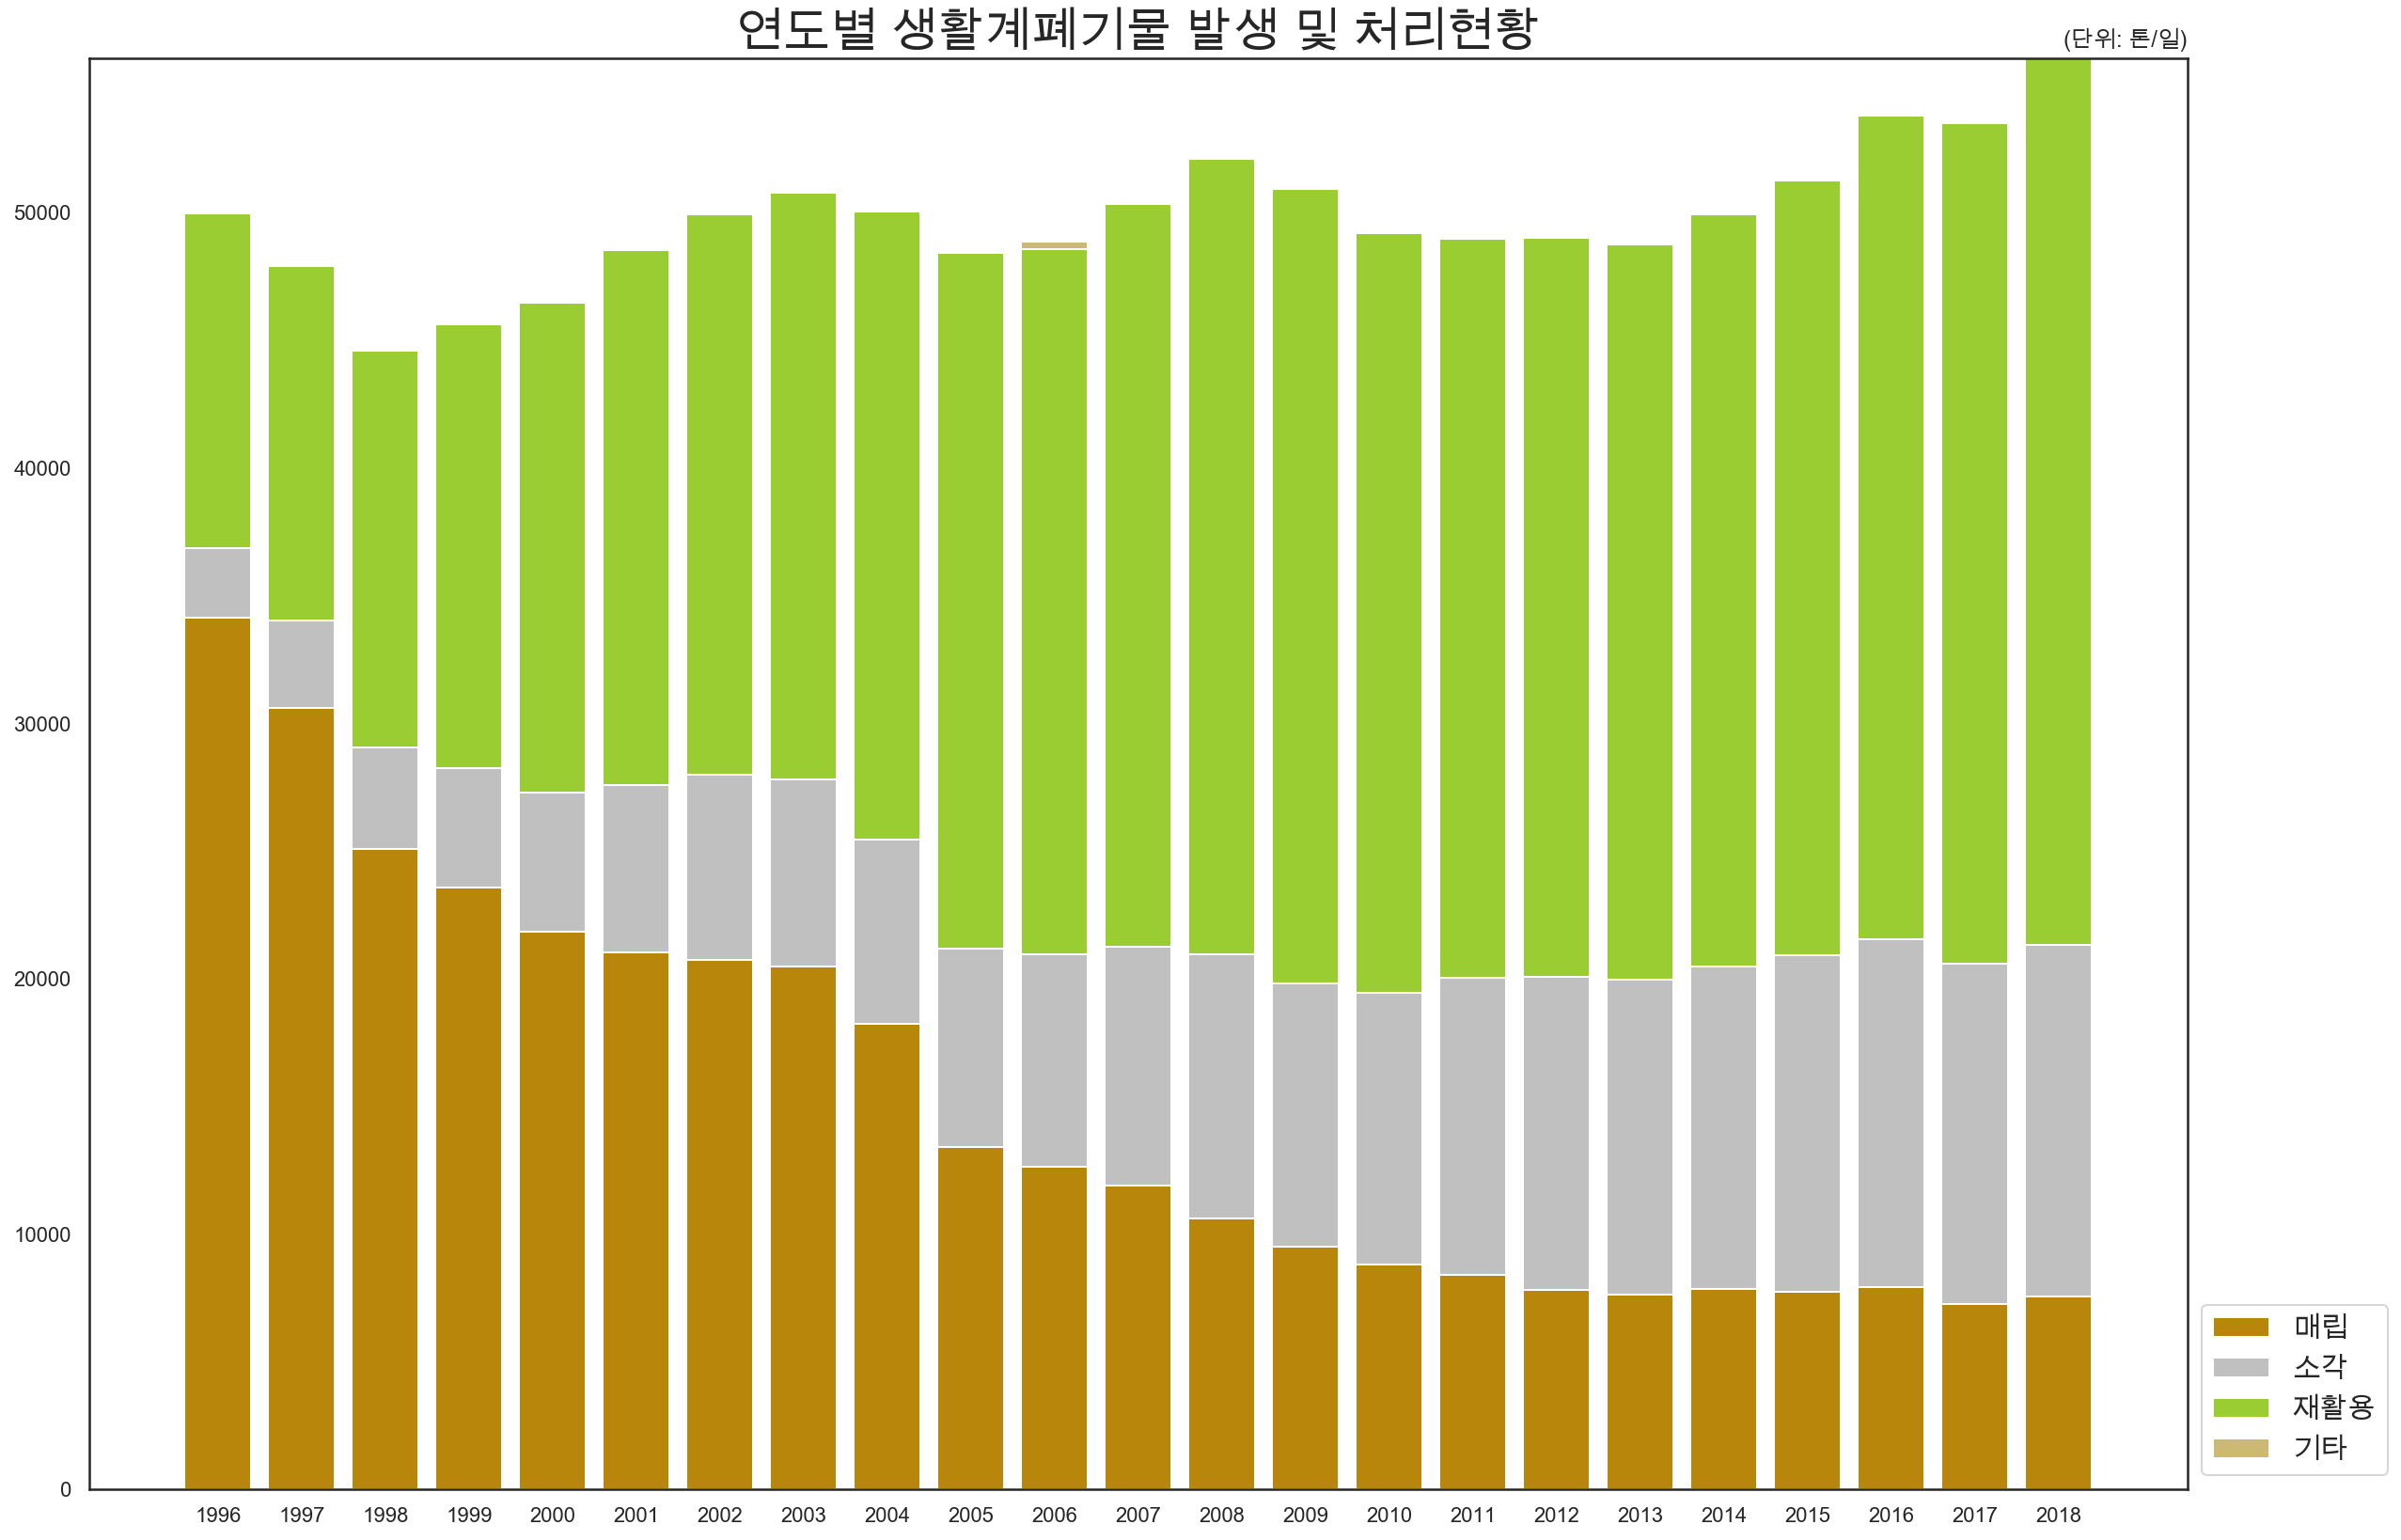

In [27]:
fig, ax = plt.subplots(figsize=(20, 14))

ax.bar(df_bar.index, df_bar['매립'], color='darkgoldenrod')
ax.bar(df_bar.index, df_bar['소각'], bottom=df_bar['매립'], color='silver')
ax.bar(df_bar.index, df_bar['재활용'], bottom=df_bar['매립']+df_bar['소각'], color='yellowgreen')
ax.bar(df_bar.index, df_bar['기타'], bottom=df_bar['매립']+df_bar['소각']+df_bar['재활용'], color='y')


ax.set_title('연도별 생활계폐기물 발생 및 처리현황', fontsize=25)
ax.set_title('(단위: 톤/일)', loc='right')
ax.legend(df_bar.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)

ax.set_facecolor('none')

plt.savefig('./image/waste_barplot.png', dpi=150)
plt.show()

## 2. ```재활용 처리``` 폐기물 연도별 종류별 순위

In [28]:
df_waste_total_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 총계 to 음식물류
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       536 non-null    object 
 1   발생량      536 non-null    float64
 2   매립 처리량   536 non-null    float64
 3   소각 처리량   536 non-null    float64
 4   재활용 처리량  536 non-null    float64
 5   기타 처리량   536 non-null    float64
dtypes: float64(5), object(1)
memory usage: 29.3+ KB


In [29]:
# 연도 형변환
df_waste_total_t['연도'] = df_waste_total_t['연도'].apply(pd.to_numeric, errors='coerce')

In [30]:
recycle = pd.pivot_table(df_waste_total_t, index=df_waste_total_t.index, values=['재활용 처리량'], columns=['연도'])
recycle.columns = recycle.columns.droplevel([0])
recycle.tail(10)

연도,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
종이류(가연성),108.5,73.7,149.7,133.1,120.1,105.1,94.7,76.8,56.9,91.3,...,97.7,80.8,55.6,66.1,121.9,299.8,320.0,304.9,465.3,492.9
총계,13084.6,13907.3,15566.0,17393.8,19166.4,20922.1,21948.3,22938.4,24587.9,27243.4,...,31126.6,29752.9,28938.9,28951.0,28783.9,29454.2,30352.2,32252.9,32931.4,34747.1
캔류,535.2,607.2,690.3,633.9,615.2,618.4,678.6,663.1,750.5,754.7,...,727.5,792.4,734.7,730.1,682.7,713.8,748.9,765.1,670.8,NaN
타이어,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,162.1,48.6,40.9,31.4,24.5,33.4,24.8,29.3,46.5,79.0
토사류(불연성),38.1,17.2,10.3,26.9,25.0,22.7,14.9,26.3,102.2,29.8,...,252.6,257.9,138.8,154.1,238.5,238.0,182.1,279.1,216.1,406.2
폐식용유,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57.4,60.6,27.3,30.2,48.2,33.8,79.5,62.2,58.7
플라스틱류,724.0,726.4,868.2,964.9,1058.0,1194.3,1267.5,1298.3,1393.4,1561.2,...,1452.0,1350.1,1305.3,1377.5,1238.9,1236.8,1453.9,1133.2,1251.4,1490.7
플라스틱류(가연성),29.6,31.2,48.0,31.2,36.1,41.8,53.2,58.5,38.2,39.1,...,228.8,121.8,87.8,183.4,301.9,413.2,528.7,937.0,1130.9,1054.3
합성수지류,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883.9,883.9,1033.1,1266.6,1335.2,1430.6,1199.9,1709.5,2168.5,2315.0
형광등,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.5,142.0,84.6,54.0,60.4,152.5,54.8,183.2,149.1,91.4


In [31]:
recycle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 가구류 to 형광등
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1996    17 non-null     float64
 1   1997    17 non-null     float64
 2   1998    17 non-null     float64
 3   1999    17 non-null     float64
 4   2000    17 non-null     float64
 5   2001    17 non-null     float64
 6   2002    17 non-null     float64
 7   2003    17 non-null     float64
 8   2004    17 non-null     float64
 9   2005    17 non-null     float64
 10  2006    18 non-null     float64
 11  2007    26 non-null     float64
 12  2008    26 non-null     float64
 13  2009    28 non-null     float64
 14  2010    29 non-null     float64
 15  2011    29 non-null     float64
 16  2012    29 non-null     float64
 17  2013    29 non-null     float64
 18  2014    29 non-null     float64
 19  2015    29 non-null     float64
 20  2016    31 non-null     float64
 21  2017    31 non-null     float64
 22  2018  

In [32]:
# 총계, 소계(소계) 인덱스 삭제
recycle.drop(['총계', '소계(소계)'], inplace=True)

In [33]:
# 인덱스명 수정
recycle.rename(index={'소계(기타(배출불명 등))':'기타(배출불명 등)'}, inplace=True)

In [34]:
len(recycle.index)

32

In [35]:
recycle

연도,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
가구류,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,436.9,387.8,408.9,342.4,365.7,381.6,416.9,462.9,533.6,670.1
고무피혁류(가연성),13.0,7.0,14.4,10.6,5.1,7.8,12.6,16.1,28.3,11.7,...,145.8,14.7,26.8,7.1,7.5,60.5,74.1,72.9,72.2,103.4
고철류,1955.2,2162.5,2619.4,2504.3,2616.3,2814.0,2738.0,2785.4,2655.9,2634.0,...,2270.0,2000.9,1971.6,2243.3,2207.3,1967.1,1691.4,1721.6,1489.9,1420.2
금속류(불연성),127.2,74.5,45.3,52.0,66.5,37.9,30.5,32.6,29.7,22.5,...,48.9,26.8,24.5,31.6,17.1,20.6,22.1,34.8,34.5,62.6
금속캔,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.6
기타,704.2,543.2,543.7,747.9,841.8,886.1,942.4,943.0,1167.0,1188.1,...,1154.8,1428.4,1488.8,1296.5,1202.3,1321.8,1273.8,1146.2,1358.1,1052.1
기타(가연성),55.1,25.4,30.9,43.2,74.1,50.3,33.2,56.3,37.2,47.4,...,288.9,291.6,265.4,324.2,365.2,443.2,497.6,878.6,1093.7,938.2
기타(불연성),157.6,28.8,34.1,73.6,41.0,79.1,61.5,107.0,257.4,193.1,...,305.8,253.6,356.8,292.4,173.7,151.7,474.4,536.0,597.7,699.0
나무류(가연성),50.0,68.7,63.7,54.6,79.4,54.0,58.6,62.5,66.0,66.1,...,813.3,835.4,798.0,510.4,1412.6,449.3,512.7,554.4,498.3,545.0
발포수지류,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.1,143.3,158.1


In [36]:
len(recycle.columns)

23

### 2-1. bar (연도별 구분)

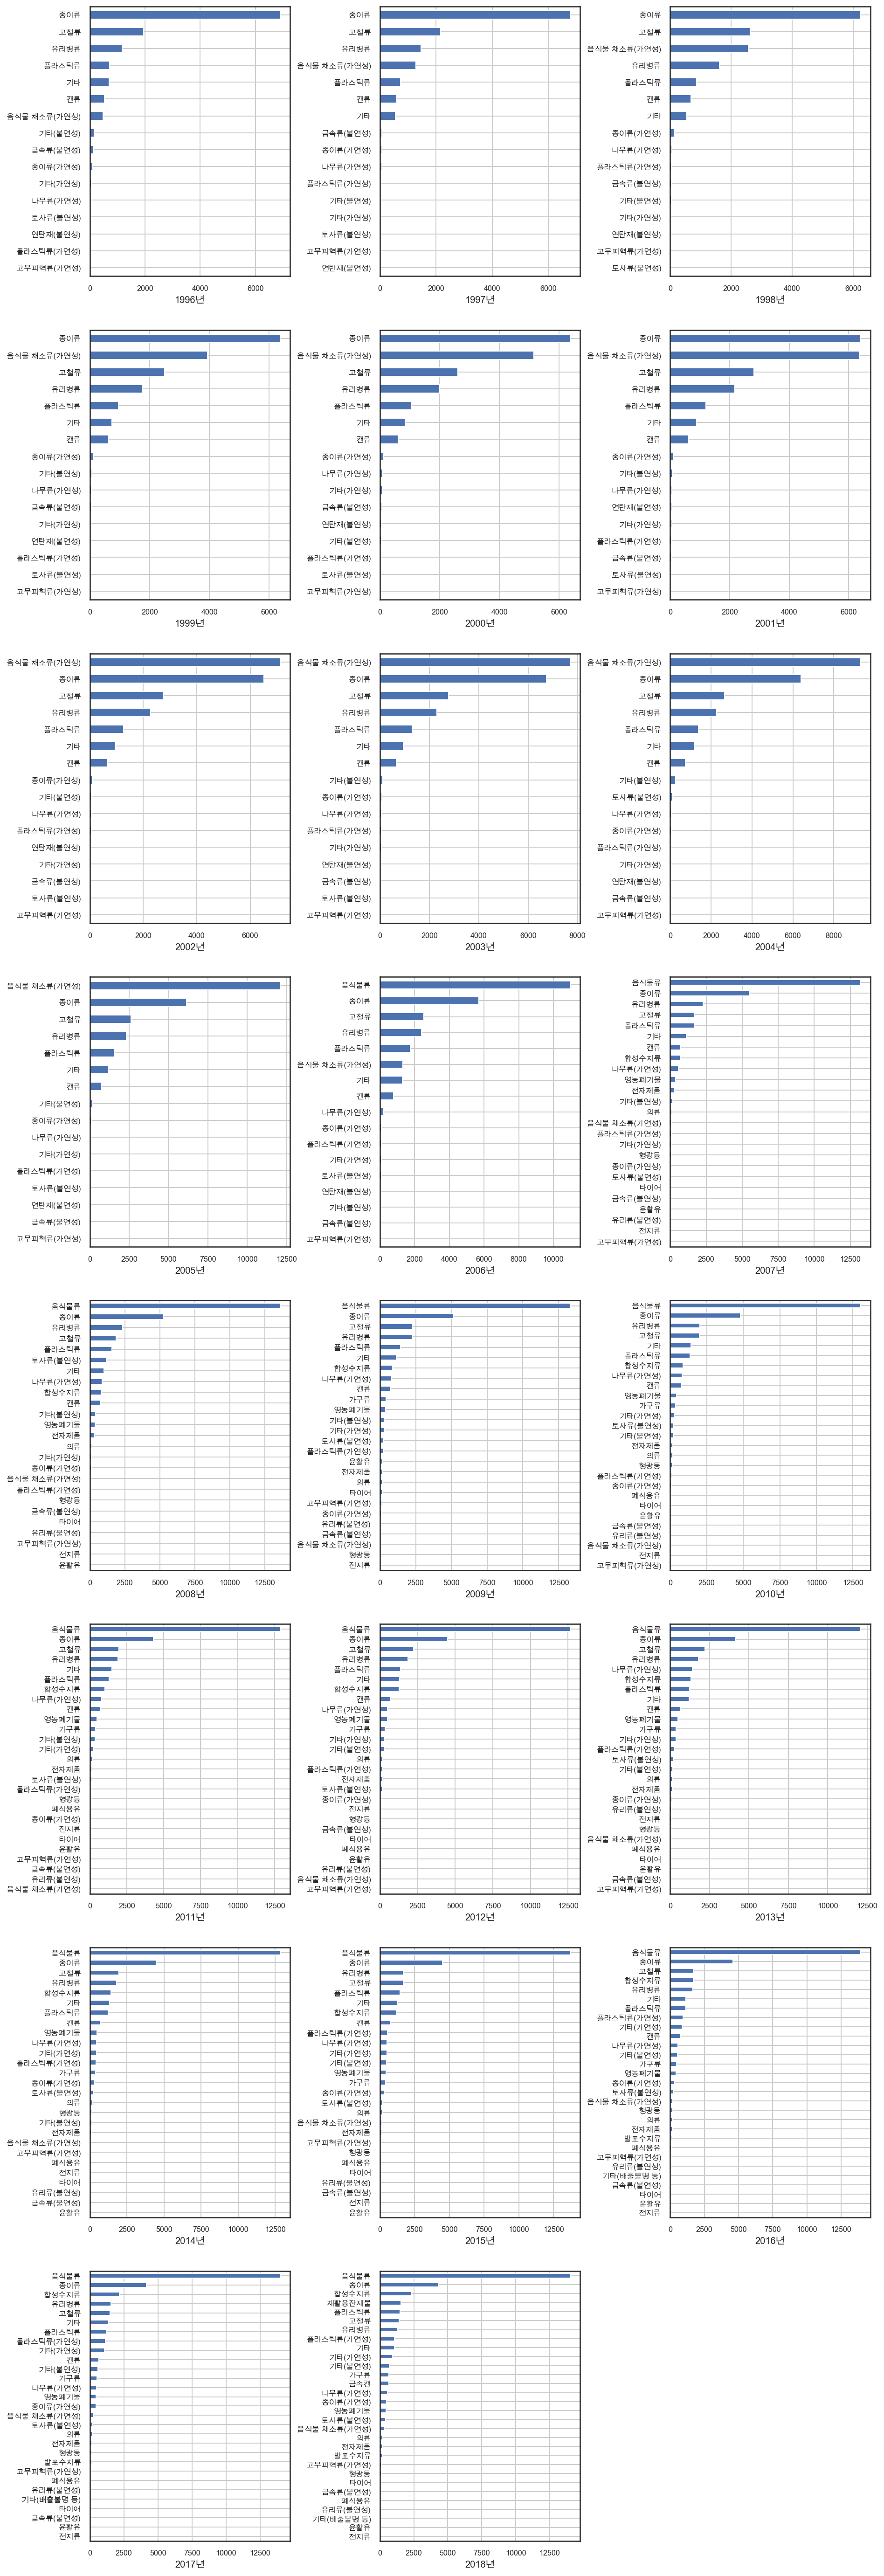

In [37]:
num = 1

for i in range(1996, 2019):
    plt.subplot(8, 3, num)
    recycle[i].dropna().sort_values().plot(
        kind='barh', grid=True, figsize=(15, 50), fontsize=8)
    plt.xlabel(str(i)+'년', fontsize=10)
    num += 1

plt.subplots_adjust(wspace=0.45)
plt.savefig('./image/waste_year_bar.png', dpi=150)
plt.show()

- 1996년 ~ 2001년엔 종이류가 배출량 1위였는데, 음식물류가 빠르게 증가하더니 2002년부터 현재까지 배출량 1위를 유지중
- 다른 분류와의 배출량 차이도 점점 벌어짐

### 2-2. heatmap (전체 연도)

In [38]:
recycle_han = {}

for i in range(1996, 2019):
    recycle_han[i] = list(recycle.sort_values(by=i, ascending=False).index)

In [39]:
recycle_han_df = pd.DataFrame(recycle_han)
recycle_han_df.head(7)

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,종이류,종이류,종이류,종이류,종이류,종이류,음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),...,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류
1,고철류,고철류,고철류,음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),종이류,종이류,종이류,종이류,...,종이류,종이류,종이류,종이류,종이류,종이류,종이류,종이류,종이류,종이류
2,유리병류,유리병류,음식물 채소류(가연성),고철류,고철류,고철류,고철류,고철류,고철류,고철류,...,고철류,유리병류,고철류,고철류,고철류,고철류,유리병류,고철류,합성수지류,합성수지류
3,플라스틱류,음식물 채소류(가연성),유리병류,유리병류,유리병류,유리병류,유리병류,유리병류,유리병류,유리병류,...,유리병류,고철류,유리병류,유리병류,유리병류,유리병류,고철류,합성수지류,유리병류,재활용잔재물
4,기타,플라스틱류,플라스틱류,플라스틱류,플라스틱류,플라스틱류,플라스틱류,플라스틱류,플라스틱류,플라스틱류,...,플라스틱류,기타,기타,플라스틱류,나무류(가연성),합성수지류,플라스틱류,유리병류,고철류,플라스틱류
5,캔류,캔류,캔류,기타,기타,기타,기타,기타,기타,기타,...,기타,플라스틱류,플라스틱류,기타,합성수지류,기타,기타,기타,기타,고철류
6,음식물 채소류(가연성),기타,기타,캔류,캔류,캔류,캔류,캔류,캔류,캔류,...,합성수지류,합성수지류,합성수지류,합성수지류,플라스틱류,플라스틱류,합성수지류,플라스틱류,플라스틱류,유리병류


In [40]:
recycle_han_df.to_csv('./datas/recycle_han_df.csv')

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = list(recycle.index)
label_num = le.fit_transform(label)

In [42]:
label

['가구류',
 '고무피혁류(가연성)',
 '고철류',
 '금속류(불연성)',
 '금속캔',
 '기타',
 '기타(가연성)',
 '기타(불연성)',
 '나무류(가연성)',
 '발포수지류',
 '기타(배출불명 등)',
 '연탄재(불연성)',
 '영농폐기물',
 '유리류(불연성)',
 '유리병류',
 '윤활유',
 '음식물 채소류(가연성)',
 '음식물류',
 '의류',
 '재활용잔재물',
 '전자제품',
 '전지류',
 '종이류',
 '종이류(가연성)',
 '캔류',
 '타이어',
 '토사류(불연성)',
 '폐식용유',
 '플라스틱류',
 '플라스틱류(가연성)',
 '합성수지류',
 '형광등']

In [43]:
label_num

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10,  7, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [44]:
le.inverse_transform([4, 31])

array(['금속캔', '형광등'], dtype='<U12')

In [45]:
labeldic = dict(zip(label, label_num))
labeldic

{'가구류': 0,
 '고무피혁류(가연성)': 1,
 '고철류': 2,
 '금속류(불연성)': 3,
 '금속캔': 4,
 '기타': 5,
 '기타(가연성)': 6,
 '기타(불연성)': 8,
 '나무류(가연성)': 9,
 '발포수지류': 10,
 '기타(배출불명 등)': 7,
 '연탄재(불연성)': 11,
 '영농폐기물': 12,
 '유리류(불연성)': 13,
 '유리병류': 14,
 '윤활유': 15,
 '음식물 채소류(가연성)': 16,
 '음식물류': 17,
 '의류': 18,
 '재활용잔재물': 19,
 '전자제품': 20,
 '전지류': 21,
 '종이류': 22,
 '종이류(가연성)': 23,
 '캔류': 24,
 '타이어': 25,
 '토사류(불연성)': 26,
 '폐식용유': 27,
 '플라스틱류': 28,
 '플라스틱류(가연성)': 29,
 '합성수지류': 30,
 '형광등': 31}

In [46]:
recycle_copy = recycle.copy()
recycle_copy.index = label_num
recycle_copy

연도,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,436.9,387.8,408.9,342.4,365.7,381.6,416.9,462.9,533.6,670.1
1,13.0,7.0,14.4,10.6,5.1,7.8,12.6,16.1,28.3,11.7,...,145.8,14.7,26.8,7.1,7.5,60.5,74.1,72.9,72.2,103.4
2,1955.2,2162.5,2619.4,2504.3,2616.3,2814.0,2738.0,2785.4,2655.9,2634.0,...,2270.0,2000.9,1971.6,2243.3,2207.3,1967.1,1691.4,1721.6,1489.9,1420.2
3,127.2,74.5,45.3,52.0,66.5,37.9,30.5,32.6,29.7,22.5,...,48.9,26.8,24.5,31.6,17.1,20.6,22.1,34.8,34.5,62.6
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.6
5,704.2,543.2,543.7,747.9,841.8,886.1,942.4,943.0,1167.0,1188.1,...,1154.8,1428.4,1488.8,1296.5,1202.3,1321.8,1273.8,1146.2,1358.1,1052.1
6,55.1,25.4,30.9,43.2,74.1,50.3,33.2,56.3,37.2,47.4,...,288.9,291.6,265.4,324.2,365.2,443.2,497.6,878.6,1093.7,938.2
8,157.6,28.8,34.1,73.6,41.0,79.1,61.5,107.0,257.4,193.1,...,305.8,253.6,356.8,292.4,173.7,151.7,474.4,536.0,597.7,699.0
9,50.0,68.7,63.7,54.6,79.4,54.0,58.6,62.5,66.0,66.1,...,813.3,835.4,798.0,510.4,1412.6,449.3,512.7,554.4,498.3,545.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.1,143.3,158.1


In [47]:
rank = {}

for i in range(1996, 2019):
    rank[i] = list(recycle_copy[i].sort_values(ascending=False).values)

In [48]:
rank_df = pd.DataFrame(rank)
rank_df.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,6900.4,6796.4,6249.1,6372.9,6384.2,6405.6,7130.0,7718.4,9316.0,12104.3,...,13334.3,13032.3,12885.2,12662.0,12099.5,12848.7,13729.8,13936.3,13989.3,14039.6
1,1955.2,2162.5,2619.4,3928.5,5161.0,6378.3,6505.9,6748.1,6388.8,6149.1,...,5163.9,4809.7,4300.7,4486.3,4128.4,4485.1,4513.7,4602.5,4151.3,4281.5
2,1179.3,1463.8,2566.0,2504.3,2616.3,2814.0,2738.0,2785.4,2655.9,2634.0,...,2270.0,2034.9,1971.6,2243.3,2207.3,1967.1,1692.8,1721.6,2168.5,2315.0
3,724.0,1274.6,1609.2,1776.4,2000.6,2175.7,2279.3,2301.9,2268.5,2323.4,...,2263.9,2000.9,1907.8,1866.2,1797.4,1792.0,1691.4,1709.5,1572.3,1546.5
4,704.2,726.4,868.2,964.9,1058.0,1194.3,1267.5,1298.3,1393.4,1561.2,...,1452.0,1428.4,1488.8,1377.5,1412.6,1430.6,1453.9,1662.8,1489.9,1490.7


In [49]:
mask = rank_df.isnull()
mask.tail()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
27,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
28,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
29,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
30,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
31,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [50]:
recycle_rank = {}

for i in range(1996, 2019):
    recycle_rank[i] = list(recycle_copy.sort_values(by=i, ascending=False).index)

In [51]:
recycle_rank_df = pd.DataFrame(recycle_rank)
recycle_rank_df.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,22,22,22,22,22,22,16,16,16,16,...,17,17,17,17,17,17,17,17,17,17
1,2,2,2,16,16,16,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2,14,14,16,2,2,2,2,2,2,2,...,2,14,2,2,2,2,14,2,30,30
3,28,16,14,14,14,14,14,14,14,14,...,14,2,14,14,14,14,2,30,14,19
4,5,28,28,28,28,28,28,28,28,28,...,28,5,5,28,9,30,28,14,2,28


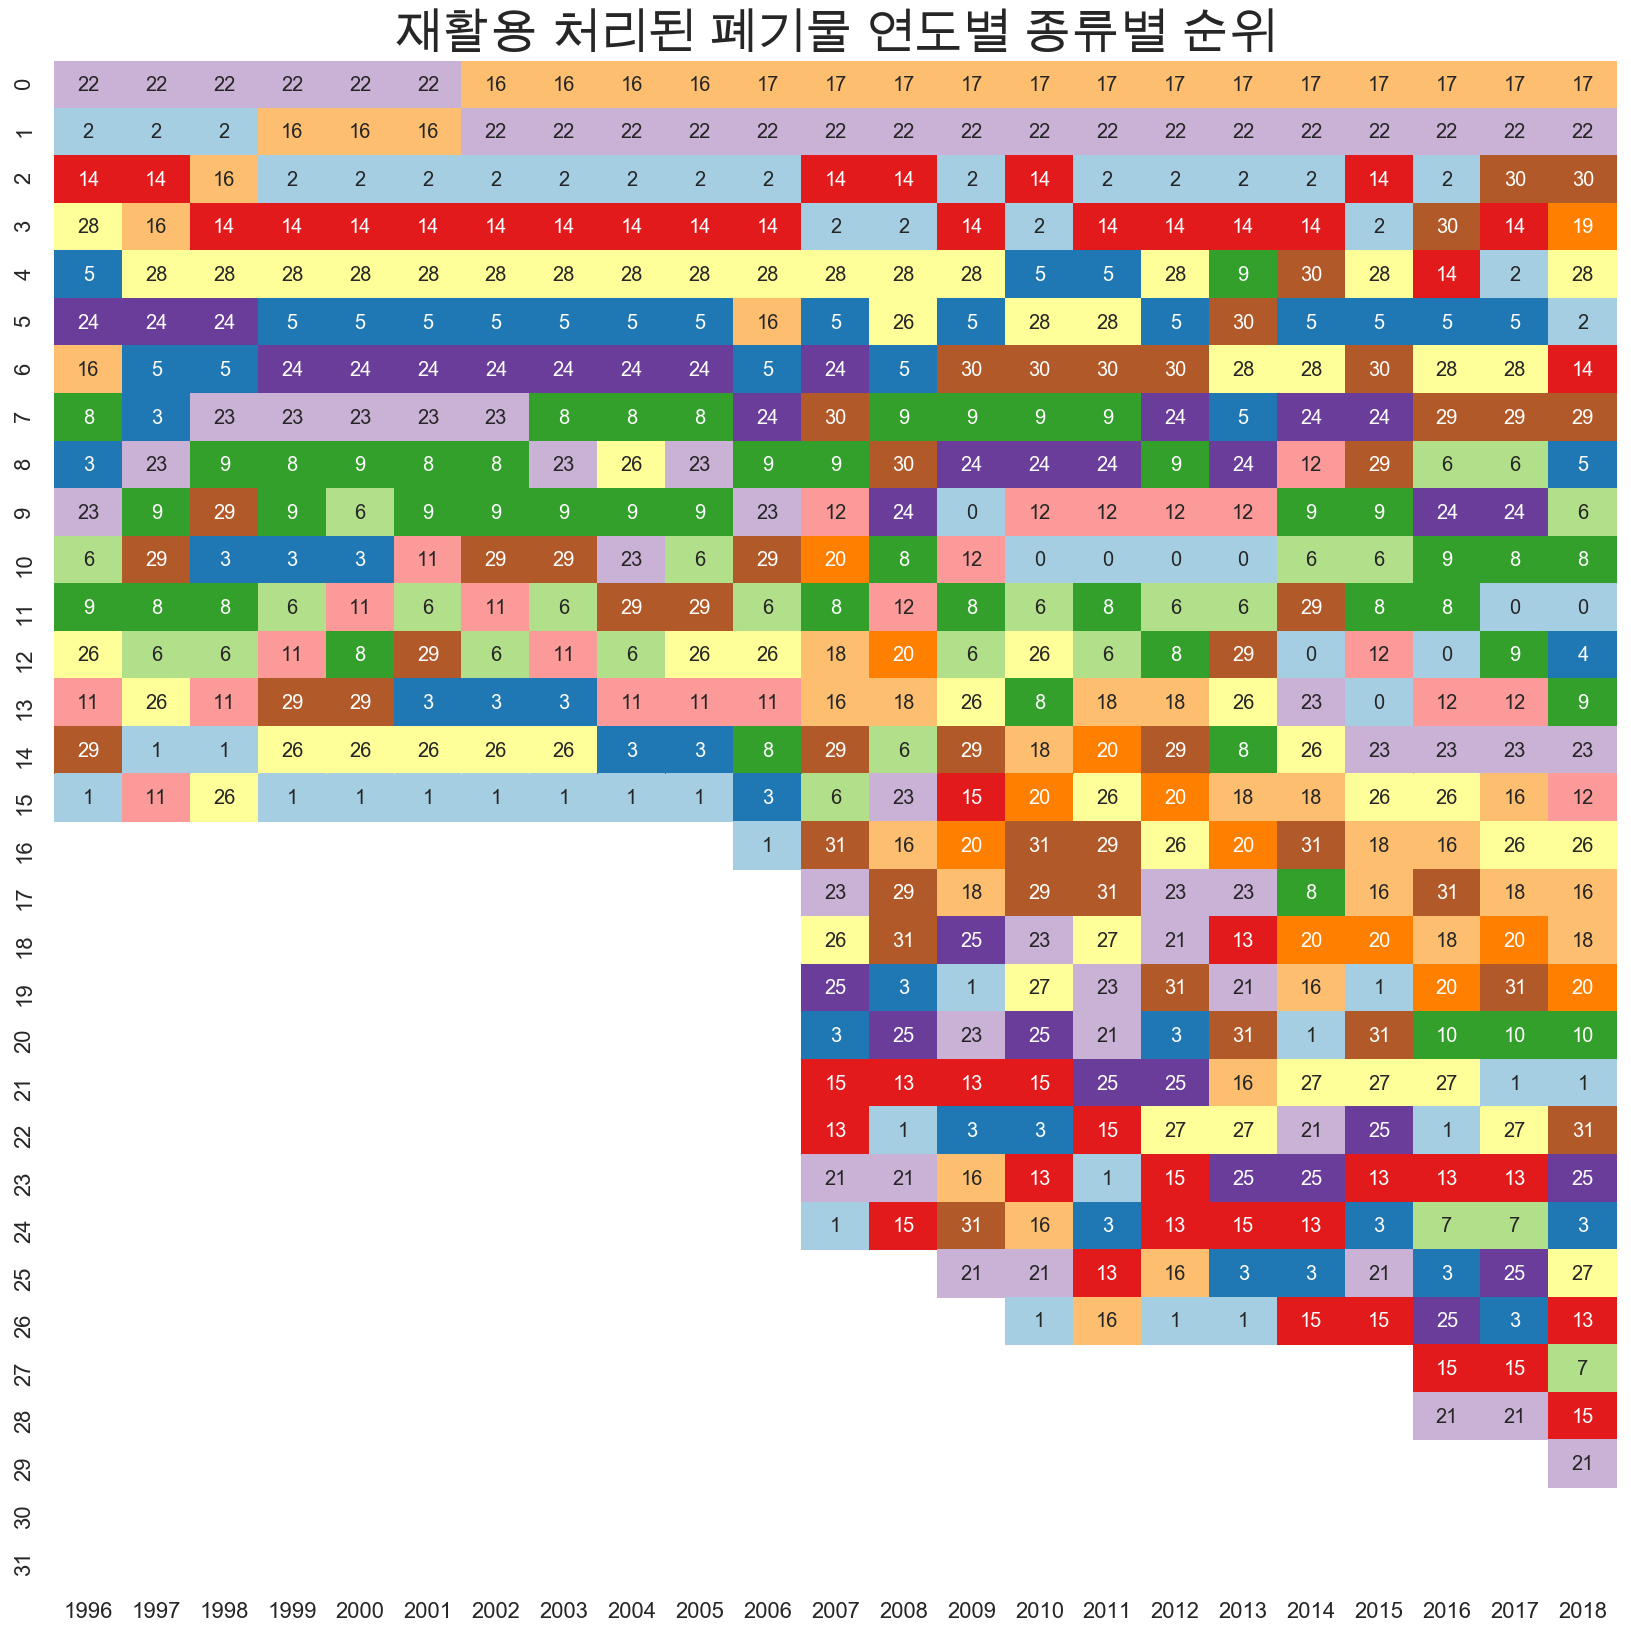

In [52]:
plt.subplots(figsize=(14, 14))

sns.heatmap(recycle_rank_df, mask=mask, annot=True, fmt="d", cmap=plt.cm.Paired, cbar=False)
plt.title("재활용 처리된 폐기물 연도별 종류별 순위", fontsize=24)

plt.savefig('./image/waste_recycle_rank.png', dpi=150)
plt.show()

- 숫자가 같으면 같은 분류, 빈 곳은 NaN
- 단, 현재에 가까울수록 분류가 세분화된 것이기 때문에, 과거에 NaN이 많은 것이 해당 분류의 폐기물이 없었다는 의미는 아님
- 과거와 현재의 분류가 다르기 때문에, 분류를 수정할 필요가 잆음

- 대체로 음식물, 종이, 플라스틱 등이 상위권에 위치함

In [53]:
# 그래프 상의 숫자 구분
recycle_rank_df_info = pd.DataFrame(label, label_num)
a = recycle_rank_df_info[0:16].reset_index(drop=True)
b = recycle_rank_df_info[16:].reset_index()
info = pd.concat([a,b], axis=1)
info

,0,index,0
0,가구류,16,음식물 채소류(가연성)
1,고무피혁류(가연성),17,음식물류
2,고철류,18,의류
3,금속류(불연성),19,재활용잔재물
4,금속캔,20,전자제품
5,기타,21,전지류
6,기타(가연성),22,종이류
7,기타(불연성),23,종이류(가연성)
8,나무류(가연성),24,캔류
9,발포수지류,25,타이어


## 3. ```재활용 처리``` 폐기물(음식물 관련) 연도별 변화추이 (시도별 구분)

In [54]:
# 데이터 불러오기
df_waste_sido = pd.read_csv('./datas/waste.csv', header=[0,1,2,3], index_col=[0,1,2])
df_waste_sido

시도별(1)         1996                                                        \
시도별(1)           총계 종량제방식에의한혼합배출                                            
시도별(1)           소계          가연성                                            
시도별(1)           소계           소계  음식물 채소류     종이류     나무류   고무피혁류   플라스틱류   
강원 발생량 소계    1727.0        914.0    394.0   205.0    64.0    34.0    64.0   
   처리량 기타       0.0          0.0      0.0     0.0     0.0     0.0     0.0   
       매립    1421.0        855.0    390.0   183.0    50.0    32.0    54.0   
       소각      57.0         57.0      2.0    22.0    14.0     2.0    10.0   
       재활용    249.0          2.0      2.0     0.0     0.0     0.0     0.0   
...             ...          ...      ...     ...     ...     ...     ...   
합계 발생량 소계   49925.2      30305.7  14531.8  6379.7  1856.7  1121.9  2166.4   
   처리량 기타       0.0          0.0      0.0     0.0     0.0     0.0     0.0   
       매 립  34115.6      26905.3  13486.4  5276.5  1420.7   997.6  1907.6   
       소 각   2725.0       2668.3    569.5   994.7   386.0   111.3   229.2   
       재활용  13084.6        732.1    475.9   108.5    50.0    13.0    29.6   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)                 불연성          ...          윤활유   형광등     고철류     의류   
시도별(1)          기타      소계     연탄재  ...           소계    소계      소계     소계   
강원 발생량 소계    153.0   567.0   210.0  ...         13.3   0.6    39.8   18.5   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매립    146.0   566.0   210.0  ...          0.0   0.0     0.0    0.0   
       소각      7.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용     0.0     1.0     0.0  ...         13.3   0.6    39.8   18.5   
...            ...     ...     ...  ...          ...   ...     ...    ...   
합계 발생량 소계   4249.2  7456.7  1852.9  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매 립  3816.5  7089.5  1821.6  ...          0.0   0.0     0.0    0.0   
       소 각   377.6    13.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    55.1   354.2    31.3  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
강원 발생량 소계    37.9   12.3   0.9    53.1    33.6       453.6  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매립     0.0    0.0   0.0     0.0     0.0        23.0  
       소각     0.0    0.0   0.0     0.0     0.0        23.7  
       재활용   37.9   12.3   0.9    53.1    33.6       406.9  
...           ...    ...   ...     ...     ...         ...  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[89 rows x 605 columns]

In [55]:
df_waste_sido.index.values

array([('강원', '발생량', '소계'), ('강원', '처리량', '기타'), ('강원', '처리량', '매립'),
       ('강원', '처리량', '소각'), ('강원', '처리량', '재활용'), ('경기', '발생량', '소계'),
       ('경기', '처리량', '기타'), ('경기', '처리량', '매립'), ('경기', '처리량', '소각'),
       ('경기', '처리량', '재활용'), ('경남', '발생량', '소계'), ('경남', '처리량', '기타'),
       ('경남', '처리량', '매립'), ('경남', '처리량', '소각'), ('경남', '처리량', '재활용'),
       ('경북', '발생량', '소계'), ('경북', '처리량', '기타'), ('경북', '처리량', '매립'),
       ('경북', '처리량', '소각'), ('경북', '처리량', '재활용'), ('광주', '발생량', '소계'),
       ('광주', '처리량', '기타'), ('광주', '처리량', '매립'), ('광주', '처리량', '소각'),
       ('광주', '처리량', '재활용'), ('대구', '발생량', '소계'), ('대구', '처리량', '기타'),
       ('대구', '처리량', '매립'), ('대구', '처리량', '소각'), ('대구', '처리량', '재활용'),
       ('대전', '발생량', '소계'), ('대전', '처리량', '기타'), ('대전', '처리량', '매립'),
       ('대전', '처리량', '소각'), ('대전', '처리량', '재활용'), ('부산', '발생량', '소계'),
       ('부산', '처리량', '기타'), ('부산', '처리량', '매 립'), ('부산', '처리량', '소각'),
       ('부산', '처리량', '재활용'), ('서울', '발생량', '소계'), ('서울', '처리량', '기타'),
       ('서울

In [56]:
sido_re = []
for i in range(len(df_waste_sido.index)):
    if df_waste_sido.index[i][1] == '처리량' and df_waste_sido.index[i][2] == '재활용':
        sido_re.append(df_waste_sido.index[i])
        
sido_re

[('강원', '처리량', '재활용'),
 ('경기', '처리량', '재활용'),
 ('경남', '처리량', '재활용'),
 ('경북', '처리량', '재활용'),
 ('광주', '처리량', '재활용'),
 ('대구', '처리량', '재활용'),
 ('대전', '처리량', '재활용'),
 ('부산', '처리량', '재활용'),
 ('서울', '처리량', '재활용'),
 ('세종', '처리량', '재활용'),
 ('울산', '처리량', '재활용'),
 ('인천', '처리량', '재활용'),
 ('전남', '처리량', '재활용'),
 ('전북', '처리량', '재활용'),
 ('제주', '처리량', '재활용'),
 ('충남', '처리량', '재활용'),
 ('충북', '처리량', '재활용'),
 ('합계', '처리량', '재활용')]

In [57]:
df_waste_sido = df_waste_sido.loc[sido_re]
df_waste_sido.head()

시도별(1)        1996                                                            \
시도별(1)          총계 종량제방식에의한혼합배출                                                
시도별(1)          소계          가연성                                          불연성   
시도별(1)          소계           소계 음식물 채소류   종이류   나무류 고무피혁류 플라스틱류    기타     소계   
강원 처리량 재활용   249.0          2.0     2.0   0.0   0.0   0.0   0.0   0.0    1.0   
경기 처리량 재활용  2401.3        152.4    85.8  20.5  17.0   2.0  10.0  17.1   49.1   
경남 처리량 재활용  1086.0        109.0    33.0  25.0  13.0   4.0   8.0  26.0  240.0   
경북 처리량 재활용   520.0         64.0    16.0  33.0   2.0   4.0   4.0   5.0   27.0   
광주 처리량 재활용   382.0          7.0     7.0   0.0   0.0   0.0   0.0   0.0    0.0   

시도별(1)            ...         2018                                       \
시도별(1)            ... 재활용가능자원 분리배출                                        
시도별(1)            ...          윤활유   형광등    고철류    의류 영농폐기물    가구류 폐식용유   
시도별(1)       연탄재  ...           소계    소계     소계    소계    소계     소계   소계   
강원 처리량 재활용   0.0  ...         13.3   0.6   39.8  18.5  37.9   12.3  0.9   
경기 처리량 재활용  26.3  ...          0.0  24.3  122.1  13.6  26.4  323.0  4.7   
경남 처리량 재활용   0.0  ...          0.0   1.0  189.3  12.5  53.1   43.8  5.7   
경북 처리량 재활용   0.0  ...          0.1   1.2   25.6   5.1  68.0   63.7  2.1   
광주 처리량 재활용   0.0  ...          0.0   2.4    3.2   5.3   0.2    0.1  3.1   

시도별(1)                                
시도별(1)                   음식물류폐기물분리배출  
시도별(1)     재활용잔재물     기타          소계  
시도별(1)         소계     소계          소계  
강원 처리량 재활용   53.1   33.6       406.9  
경기 처리량 재활용  242.1  216.8      3480.9  
경남 처리량 재활용  106.8   76.9       850.3  
경북 처리량 재활용   45.5   96.6       685.6  
광주 처리량 재활용   12.2   37.4       509.1  

[5 rows x 605 columns]

In [58]:
df_waste_sido.columns

MultiIndex([('1996',           '총계',     '소계',      '소계'),
            ('1996', '종량제방식에의한혼합배출',    '가연성',      '소계'),
            ('1996', '종량제방식에의한혼합배출',    '가연성', '음식물 채소류'),
            ('1996', '종량제방식에의한혼합배출',    '가연성',     '종이류'),
            ('1996', '종량제방식에의한혼합배출',    '가연성',     '나무류'),
            ('1996', '종량제방식에의한혼합배출',    '가연성',   '고무피혁류'),
            ('1996', '종량제방식에의한혼합배출',    '가연성',   '플라스틱류'),
            ('1996', '종량제방식에의한혼합배출',    '가연성',      '기타'),
            ('1996', '종량제방식에의한혼합배출',    '불연성',      '소계'),
            ('1996', '종량제방식에의한혼합배출',    '불연성',     '연탄재'),
            ...
            ('2018', '재활용가능자원 분리배출',    '윤활유',      '소계'),
            ('2018', '재활용가능자원 분리배출',    '형광등',      '소계'),
            ('2018', '재활용가능자원 분리배출',    '고철류',      '소계'),
            ('2018', '재활용가능자원 분리배출',     '의류',      '소계'),
            ('2018', '재활용가능자원 분리배출',  '영농폐기물',      '소계'),
            ('2018', '재활용가능자원 분리배출',    '가구류',      '소계'),
            ('2018', '재활용가능자원 분리배출',   '

In [59]:
len(df_waste_sido.columns)

605

In [60]:
# 중분류 소계 제거
for i in range(1996, 2019):
    df_waste_sido.drop([('{}'.format(i), '종량제방식에의한혼합배출', '가연성', '소계'),
               ('{}'.format(i), '종량제방식에의한혼합배출', '불연성', '소계'),
               ('{}'.format(i), '재활용가능자원 분리배출', '소계', '소계')], axis=1, inplace=True)
df_waste_sido.tail()

시도별(1)         1996                                                           \
시도별(1)           총계 종량제방식에의한혼합배출                                               
시도별(1)           소계          가연성                                  불연성          
시도별(1)           소계      음식물 채소류    종이류   나무류 고무피혁류 플라스틱류    기타   연탄재    금속류   
전북 처리량 재활용    393.0         17.0   12.0  15.0   0.0   0.0   1.0   0.0    8.0   
제주 처리량 재활용     76.4          5.4    0.0   0.0   0.0   0.0   0.0   0.0    0.0   
충남 처리량 재활용    419.0         41.0    0.0   0.0   0.0   0.0   0.0   0.0    0.0   
충북 처리량 재활용    643.3         17.7    4.0   1.0   3.0   3.6   0.0   0.0    3.0   
합계 처리량 재활용  13084.6        475.9  108.5  50.0  13.0  29.6  55.1  31.3  127.2   

시도별(1)            ...         2018                                           \
시도별(1)            ... 재활용가능자원 분리배출                                            
시도별(1)            ...          윤활유   형광등     고철류     의류  영농폐기물    가구류  폐식용유   
시도별(1)       토사류  ...           소계    소계      소계     소계     소계     소계    소계   
전북 처리량 재활용   0.0  ...          0.0   1.8    35.9    3.1   41.5   50.1   0.2   
제주 처리량 재활용   0.0  ...          0.0   0.3   157.8    0.0   18.4    0.0   0.0   
충남 처리량 재활용   0.0  ...          0.0  11.7   365.6   25.7   41.9    8.8   2.4   
충북 처리량 재활용   7.1  ...          0.0   0.3    46.8    8.8   60.4   32.9   2.9   
합계 처리량 재활용  38.1  ...         25.4  91.4  1420.2  193.3  447.6  670.1  58.7   

시도별(1)                                  
시도별(1)                     음식물류폐기물분리배출  
시도별(1)      재활용잔재물      기타          소계  
시도별(1)          소계      소계          소계  
전북 처리량 재활용    37.9    52.1       656.2  
제주 처리량 재활용    31.1     5.7       212.7  
충남 처리량 재활용    25.2    41.5       590.9  
충북 처리량 재활용    17.7    84.1       396.1  
합계 처리량 재활용  1546.5  1052.1     14039.6  

[5 rows x 536 columns]

In [61]:
sido_index = []
for i in range(len(df_waste_sido.index)):
    sido_index.append(df_waste_sido.index[i][0])
    
sido_index

['강원',
 '경기',
 '경남',
 '경북',
 '광주',
 '대구',
 '대전',
 '부산',
 '서울',
 '세종',
 '울산',
 '인천',
 '전남',
 '전북',
 '제주',
 '충남',
 '충북',
 '합계']

In [62]:
# 인덱스 수정
df_waste_sido.index = sido_index

In [63]:
df_waste_sido.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북', '합계'],
      dtype='object')

In [64]:
# 연도 추가
year = []
for i in range(0, len(df_waste_sido.columns)):
    year.append(df_waste_sido.columns.values[i][0])
len(year)

536

In [65]:
len(df_waste_sido.columns)

536

In [66]:
df_waste_sido.loc['연도'] = year

In [67]:
# 컬럼명 수정

gubun = []
for i in range(0, len(df_waste_sido.columns)):
    if df_waste_sido.columns.values[i][1] == '총계':
        gubun.append('총계')
    elif df_waste_sido.columns.values[i][1] == '종량제방식에의한혼합배출':
        gubun.append(df_waste_sido.columns.values[i][3]+'('+df_waste_sido.columns.values[i][2]+')')
    elif df_waste_sido.columns.values[i][1] == '재활용가능자원 분리배출':
        gubun.append(df_waste_sido.columns.values[i][2])
    elif df_waste_sido.columns.values[i][1] == '음식물류폐기물분리배출':
        gubun.append('음식물류')

In [68]:
gubun[:20]

['총계',
 '음식물 채소류(가연성)',
 '종이류(가연성)',
 '나무류(가연성)',
 '고무피혁류(가연성)',
 '플라스틱류(가연성)',
 '기타(가연성)',
 '연탄재(불연성)',
 '금속류(불연성)',
 '토사류(불연성)',
 '기타(불연성)',
 '종이류',
 '유리병류',
 '캔류',
 '플라스틱류',
 '고철류',
 '기타',
 '총계',
 '음식물 채소류(가연성)',
 '종이류(가연성)']

In [69]:
# 기타 : 재활용가능자원 분리배출의 '기타'

In [70]:
len(gubun)

536

In [71]:
# 알아보기 편하게 컬럼명 수정
df_waste_sido.columns = gubun

### 시도별 음식물 폐기물의 재활용 처리량 비교

In [72]:
# 음식물 관련 컬럼만 추출 (음식물류, 음식물 채소류(가연성))
sido_food = df_waste_sido[['음식물류', '음식물 채소류(가연성)']]
sido_food.head()

,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,...,음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성)
강원,232.2,378.7,371.9,322.7,296.9,271.6,245.9,277.1,299.0,342.0,...,11.4,0.6,2.3,4.6,0.1,3.5,5.5,18.4,13.7,20.5
경기,2114.4,2961.3,3003.8,2985.6,2872.9,2768.5,2798.5,2740.3,2921.3,3167.4,...,0.0,0.0,0.0,0.0,0.0,3.6,93.9,58.9,34.6,98.2
경남,592.1,750.6,745.4,765.9,757.0,753.4,772.6,694.0,770.0,860.8,...,0.0,0.4,4.9,0.0,0.0,0.0,0.0,3.6,3.6,5.6
경북,524.1,586.4,613.9,575.1,549.5,524.1,521.7,474.8,552.7,618.6,...,10.1,0.0,0.1,0.1,11.3,1.2,1.5,5.1,7.6,6.2
광주,447.8,483.9,534.9,487.3,477.2,472.4,444.6,442.8,498.9,536.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.9,5.3


In [73]:
sido_food.tail()

,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,음식물류,...,음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성),음식물 채소류(가연성)
제주,148.3,176.7,187.7,193.7,185.9,193.3,200.1,184.6,185.6,202.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
충남,312.5,382.8,433.7,408.5,386.2,420.0,444.9,427.9,458.3,531.6,...,3.0,0.0,1.4,8.0,22.0,6.8,5.7,2.9,9.1,0.7
충북,264.1,321.4,358.3,318.6,369.4,307.1,293.6,252.9,321.5,375.8,...,4.0,5.4,4.1,0.0,2.9,2.6,1.1,17.0,16.5,18.7
합계,10989.3,13224.5,13616.9,13334.3,13032.3,12885.2,12662.0,12099.5,12848.7,13729.8,...,43.9,22.8,19.5,13.2,39.7,73.5,131.4,196.2,272.7,334.7
연도,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018


<AxesSubplot:>

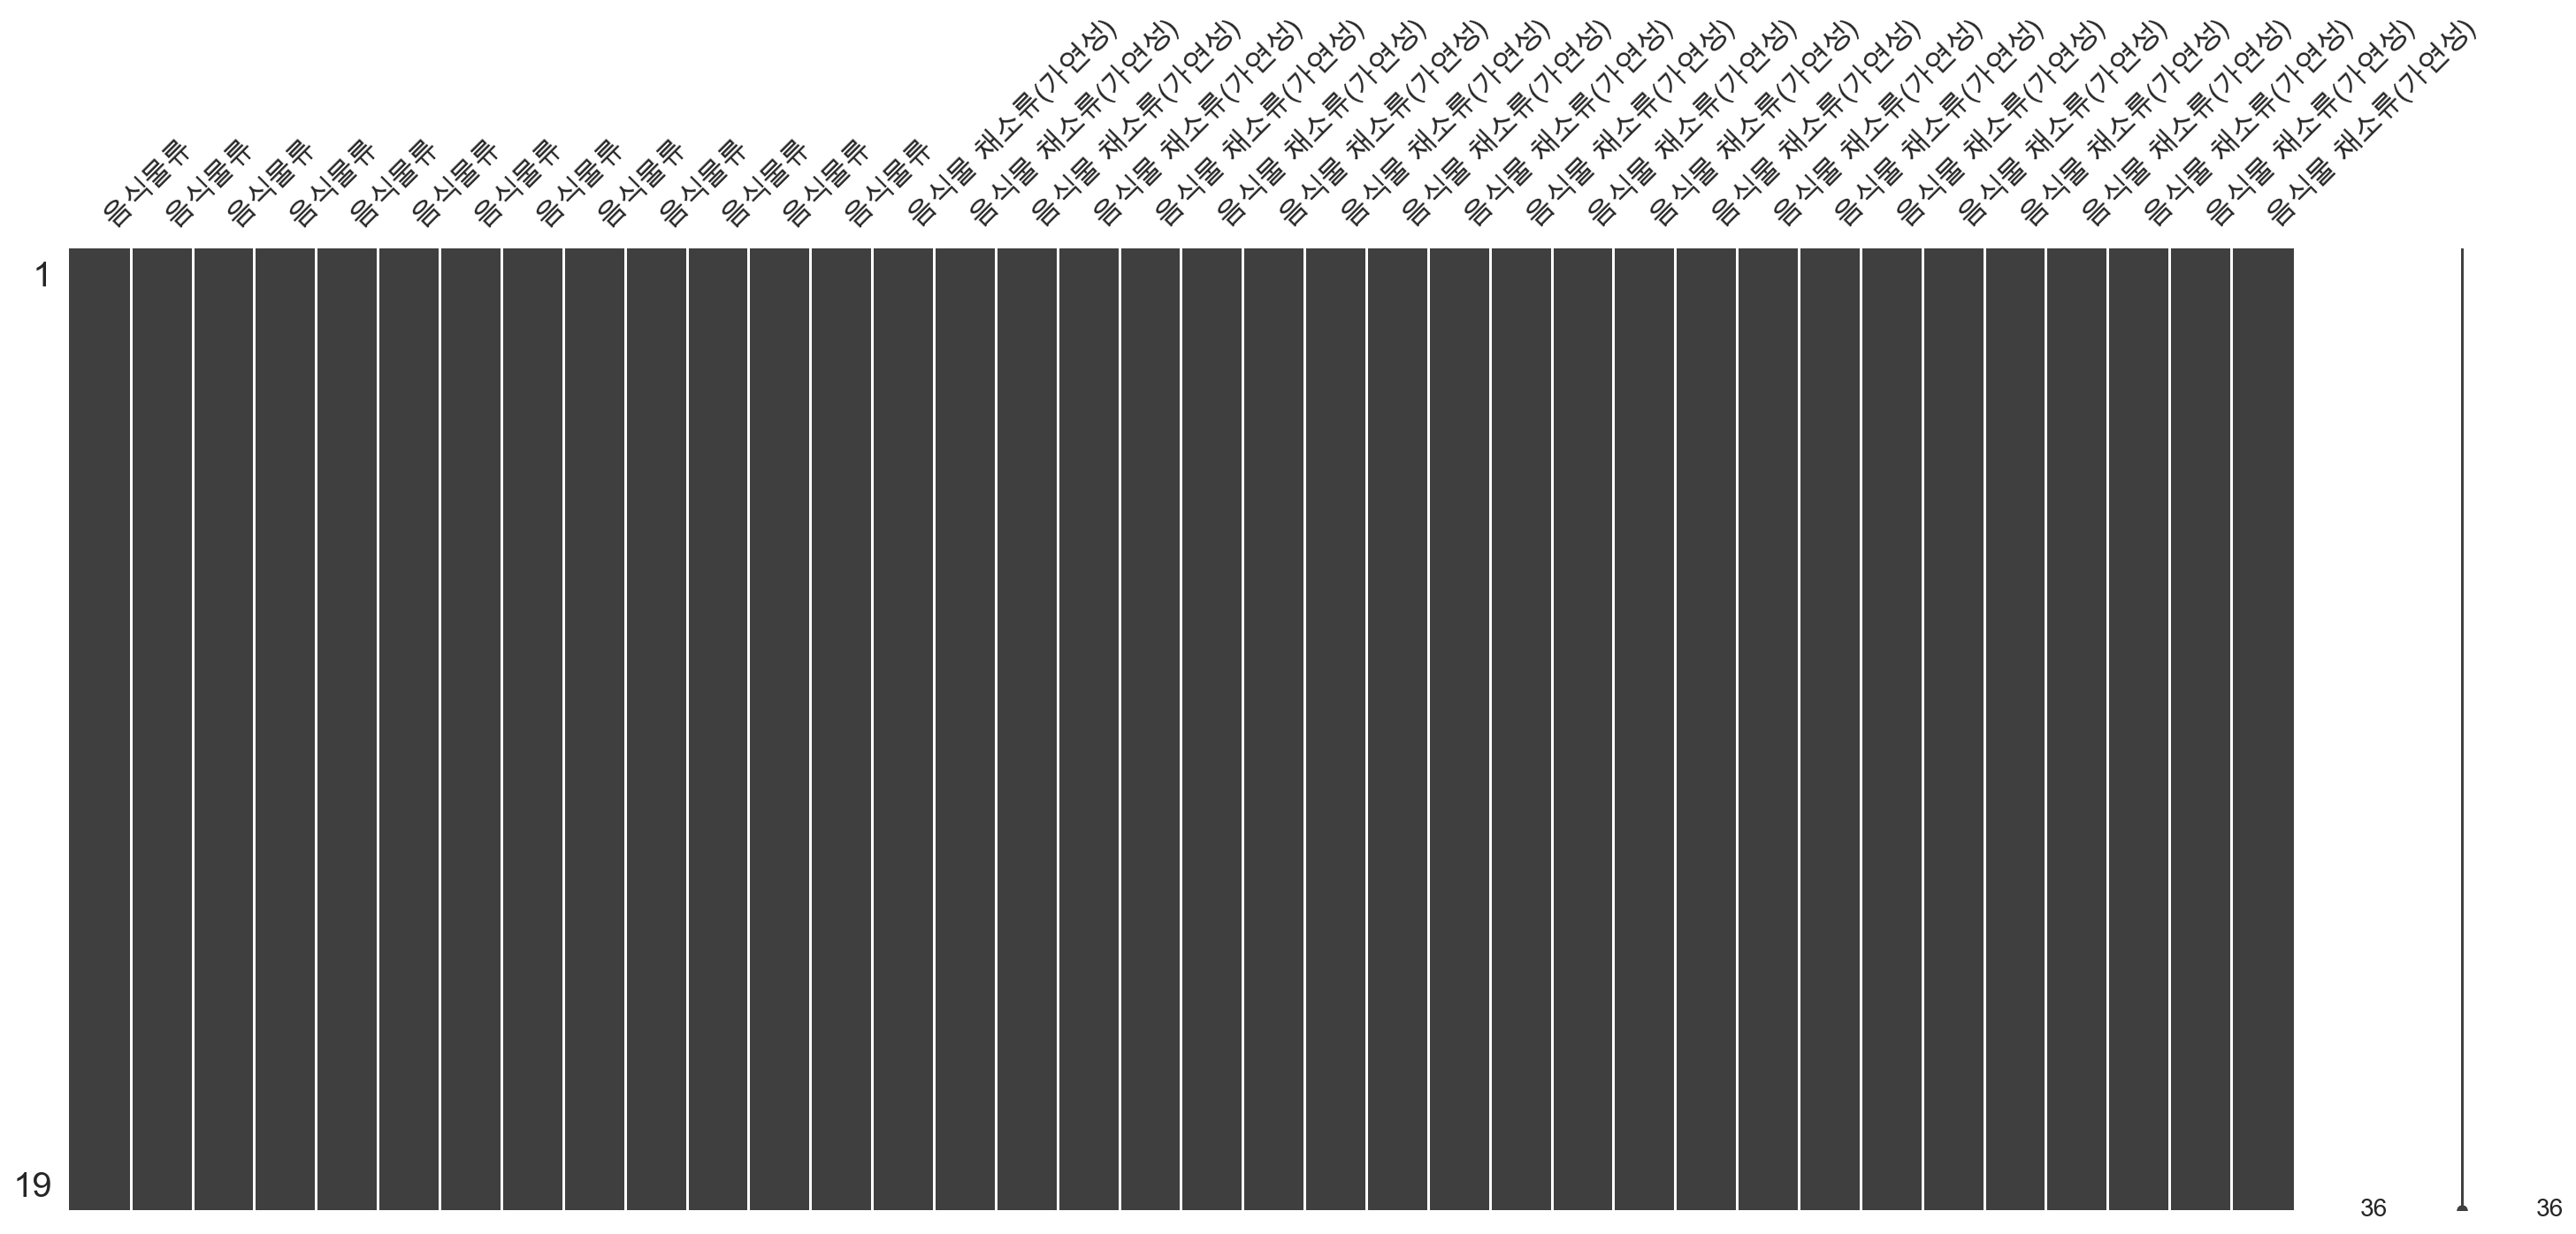

In [74]:
msno.matrix(sido_food)

In [75]:
sido_food = sido_food.T

In [76]:
sido_food.head()

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,합계,연도
음식물류,232.2,2114.4,592.1,524.1,447.8,530.3,380.5,788.9,3273.2,0.0,201.3,514.7,178.2,486.7,148.3,312.5,264.1,10989.3,2006
음식물류,378.7,2961.3,750.6,586.4,483.9,759.4,471.5,781.0,3350.3,0.0,235.1,655.1,373.5,556.8,176.7,382.8,321.4,13224.5,2007
음식물류,371.9,3003.8,745.4,613.9,534.9,691.2,504.0,816.9,3404.7,0.0,236.7,685.0,406.8,622.0,187.7,433.7,358.3,13616.9,2008
음식물류,322.7,2985.6,765.9,575.1,487.3,610.1,509.7,814.2,3447.4,0.0,245.8,670.1,376.5,603.1,193.7,408.5,318.6,13334.3,2009
음식물류,296.9,2872.9,757.0,549.5,477.2,629.7,492.7,774.4,3382.2,0.0,268.4,673.2,338.0,578.7,185.9,386.2,369.4,13032.3,2010


In [77]:
# 연도 기준으로 합치기
df_sido_food = sido_food.groupby("연도").agg("sum")
df_sido_food

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,합계
연도,,,,,,,,,,,,,,,,,,
1996,2.0,85.8,33.0,16.0,7.0,16.0,0.0,120.0,76.0,0.0,0.0,30.0,9.0,17.0,5.4,41.0,17.7,475.9
1997,0.0,318.2,95.6,44.2,23.0,90.0,25.4,160.0,217.1,0.0,32.7,39.0,59.7,17.2,20.4,91.0,41.1,1274.6
1998,76.6,697.6,110.9,98.9,42.0,105.0,67.9,346.2,527.1,0.0,55.7,108.0,63.2,60.2,29.6,121.6,55.5,2566.0
1999,71.1,990.4,217.5,139.3,137.9,185.0,75.2,454.2,879.0,0.0,61.0,180.9,83.1,134.1,39.1,192.0,88.7,3928.5
2000,128.0,1125.7,233.8,265.6,182.4,250.0,97.7,603.1,1296.5,0.0,82.1,202.2,133.2,210.6,59.5,166.4,124.2,5161.0
2001,164.8,1259.7,322.0,273.1,191.4,350.0,158.3,679.4,1714.0,0.0,104.9,330.4,146.3,291.0,77.7,196.2,119.1,6378.3
2002,171.5,1547.1,376.0,340.9,229.0,400.0,213.2,662.9,1758.4,0.0,135.8,379.7,172.4,302.8,74.9,234.5,130.9,7130.0
2003,140.9,1676.4,395.8,342.1,212.1,450.0,267.0,670.2,2041.7,0.0,214.5,432.8,187.0,237.9,87.1,206.9,156.0,7718.4
2004,156.6,1989.4,452.0,434.2,279.1,530.0,235.6,699.6,2407.0,0.0,241.9,624.9,299.5,282.4,138.8,323.3,221.7,9316.0


In [78]:
df_sido_food = df_sido_food[['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']].T

### 3-1. bar

In [79]:
len(df_sido_food.columns)

23

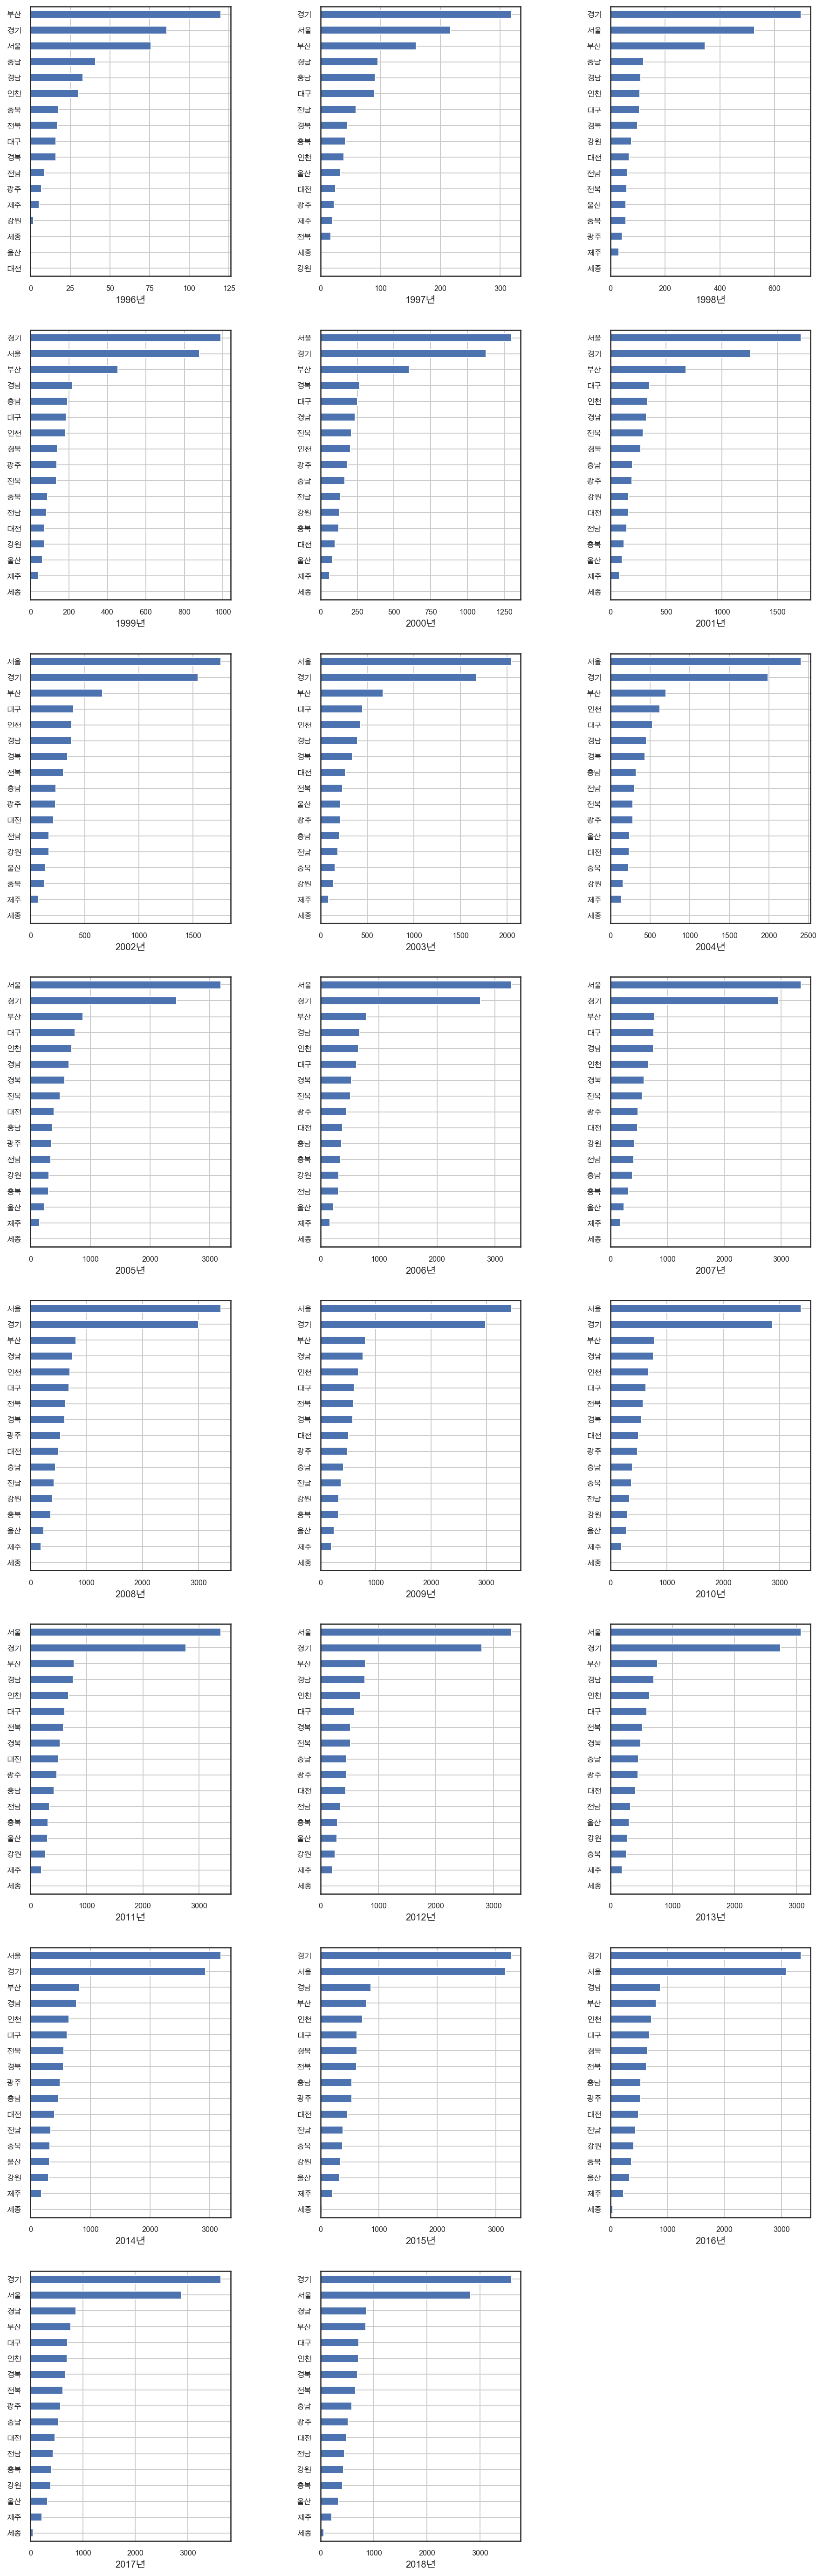

In [80]:
num = 1

for i in range(1996, 2019):
    plt.subplot(8, 3, num)
    df_sido_food['{}'.format(i)].sort_values().plot(
        kind='barh', grid=True, figsize=(15, 50), fontsize=8)
    plt.xlabel(str(i)+'년', fontsize=10)
    num += 1

plt.subplots_adjust(wspace=0.45)
plt.savefig('./image/food_sido_bar.png', dpi=150)
plt.show()

- 2000년부터 서울이 음식물 폐기물의 재활용 처리 1위: 배출량으로 해야하나..?
- 경기도가 점점 증가하더니 2015년부터 경기도가 1위
- 2012.07.01.세종특별자치시 출범